In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
from random import*
from scipy.stats import entropy
from Bio import SeqIO

# Problem 1, question a)

In [2]:
records = list(SeqIO.parse("crp_sites.fa", "fasta"))

In [3]:
str(records[0].seq)

'ATAAGCAGGATTTAGCTCACACTTAT'

In [4]:
raw_seqs=[] #array of strings
for i in range(len(records)): #loop over rows
    raw_seqs.append(str(records[i].seq))

# Problem 1, question b)

In [5]:
dictionary=dict([('A',0), ('C', 1), ('G', 2), ('T', 3)])

In [6]:
seqarray=np.zeros((len(raw_seqs),len(raw_seqs[0])))
for seqid in range(len(raw_seqs)):
    seqarray[seqid]=[dictionary[character] for character in raw_seqs[seqid]]

In [7]:
seqarray=seqarray.astype(np.int8) #we want integers

# Problem 2, questions c, d and h)

In [8]:
frequencies=np.zeros((len(seqarray[0]),np.max(seqarray)+1))
entropies=np.zeros(len(seqarray[0]))
products=np.zeros((len(seqarray[0]),np.max(seqarray)+1))
for i in range(len(seqarray[0])): #loop over columns
    hist, bin_edges = np.histogram(seqarray[:,i], bins=[0, 1, 2, 3, 4])
    frequencies[i,:]=hist/len(seqarray)
    entropies[i]=entropy(frequencies[i,:], base=2)
    products[i,:]=(2-entropies[i])*frequencies[i,:];

In [9]:
frequencies[0,:]

array([0.37150838, 0.18156425, 0.20111732, 0.24581006])

In [10]:
#checking: no frequency should be larger than one
np.max(frequencies) 

0.7346368715083799

In [11]:
#checking: frequencies should sum to one
sums=np.zeros(len(seqarray[0]))
for i in range(len(seqarray[0])): #loop over columns
    sums[i]=np.sum(frequencies[i,:])
sums

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Problem 1, question e)

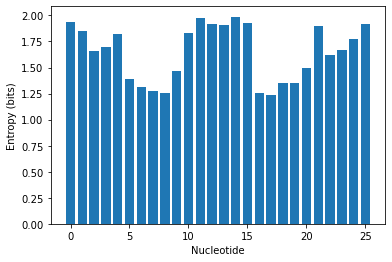

In [12]:
plt.bar(range(len(seqarray[0])),entropies)
ax = plt.gca()
ax.set_xlabel("Nucleotide")
ax.set_ylabel("Entropy (bits)")
plt.show()

In [13]:
math.log(4,2) #uniform distribution -> maximum entropy

2.0

The maximum possible value of entropy is obtained in the case of a uniform distribution - each of the N=4 states having the same probability 1/N. 

Column 8 has a smaller entropy than column 11. This means that column 11 is more variable than column 8 (closer to a uniform distribution). 

# Problem 1, question f)

In [14]:
np.shape(seqarray)

(358, 26)

In [32]:
4/358

0.0111731843575419

In [33]:
21/358

0.05865921787709497

In [34]:
math.log(21,2)

4.392317422778761

Here, for each column, K=4 and N=358. Hence, K/N=0.011, to be compared with entropies of order 2 bits. The finite size effects are not too large, less than 1% in relative terms. In the case of protein sequences, K=21 instead of 4. So, for the same N, we would have K/N=0.059, which is still quite small compared to the maximum entropy that would then be possible, log_2(21)=4.4, but now it's more than 1% in relative terms.

# Problem 1, question g)

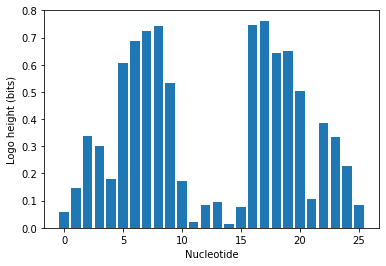

In [35]:
plt.bar(range(len(seqarray[0])),2-entropies)
ax = plt.gca()
ax.set_xlabel("Nucleotide")
ax.set_ylabel("Logo height (bits)")
plt.show()

The height quantifies conservation: for a highly conserved column, the height is large, for one where nucleotides are uniformly distributed the height is zero. Entropy is positive and its maximum value, obtained for the uniform case, is 2 here: hence, it ranges between 0 and 2. Therefore, the height also ranges between 0 and 2. Column 11 has a height close to 0, while column 8 has one of the highest heights but it is not approaching 2 (in this dataset we do not have any case of perfect or near-perfect conservation).

# Problem 1, question i)

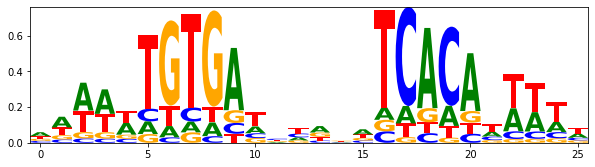

In [36]:
import pandas as pd
import logomaker as lm
%matplotlib inline
plt.ion()
products_pd = pd.DataFrame(data=products,columns=["A","C","G","T"])
lm.Logo(products_pd)

# Problem 1, question j)

In these logos, the most frequent nucleotide is on top, the next frequent one just below, and so on. Hence we can read the consensus sequence by just reading the top (and largest) letter of each column. This representation makes the consensus sequence easily visible, except in sites with very low conservation (i.e., highly variable sites).

# Problem 1, question k)

This logo allows to see quite prominently which sites are conserved (via the height) and thus particularly important for the alignment considered. At the same time, we can see which are the main nucleotides at these sites very well since the height of each letter is proportional to frequency. The consensus sequence is also easily visible (apart from sites where anyway there is so little conservation that the most frequent nucleotide has little meaning). This representation combines two important pieces of information.

# Problem 1, question l)

The strongest binding of CRP to DNA should occur on the most conserved regions - thus explaining the evolutionary pressure to conserve them. And indeed, CRP is a dimer that binds at two places, reflecting the two conserved regions here.